Wicaksa Munajat
CST383 Summer 2022
June 12, 2022

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. We defined the Gini index value for a node in a classification tree as 2p * (1-p).

    Where p is the estimated probability of either of the two classes.  
    For example, if a node has 30 training instances of class A, and 50 training instances of class B, then the estimated probability of class A is 30/(30 + 50).  What is the Gini index value for this node?  

    Gini Index = 2(0.375) * (1-0.375) = 0.46875 

2.	Create a new Python file.  Fill in the code below to create a function that gives the Gini value for a node in a binary classification tree given values for the number of instances of each class.  class_counts is a list of length two.   

In [97]:
def gini(class_counts):
    """ return the Gini value for a node in a binary classif. tree """
    # base case
    if sum(class_counts) == 0:
        return 0
    # your code here (don't forget the return statement)
    p = class_counts[0] / (class_counts[0] + class_counts[1])
    return (2*p) * (1-p)

3.	Test your function.  What is gini([30, 50])? gini([10, 10])?  What is gini([20, 0])?  What is gini([100, 0])? 

In [98]:
test1 = [30,50]
test2 = [10,10]
test3 = [20,0]

print(gini(test1))
print(gini(test2))
print(gini(test3))

0.46875
0.5
0.0


4.	Add the following code at the top of your file to read and preprocess the data.

<AxesSubplot:xlabel='age', ylabel='maxhr'>

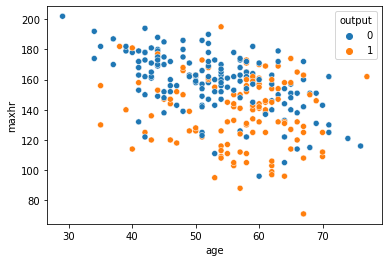

In [99]:
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/heart.csv")
df['output'] = df['output'] - 1

df = df[['age', 'maxhr', 'restbp', 'output']]
sns.scatterplot(x='age', y='maxhr', hue='output', data=df)

5.	Run the code and look at the plot.  
    If we were going to build a classification tree, and split first on 'age', what do you think a good age value to split on would be?

    I would say 53-54.

6.	Compute the Gini index for df as a whole.  For this you just need the number of rows with output = 0 and the number of rows with output = 1.

In [100]:
# Get value counts for 0's and 1's
vc = df['output'].value_counts().tolist()
print(gini(vc))

# Check
gini_root = gini([(df['output'] == i).sum() for i in [0,1]])
print(gini_root)

0.49382716049382713
0.49382716049382713


7.	Now consider a split on age < 50.  Write code to compute the Gini index for the case of of age < 50 and the Gini index for the case of age >= 50.  For the case of age < 50, get the rows of df where age < 50, then count the number of rows with output = 0 and output = 1.  


In [101]:
df.head()

,age,maxhr,restbp,output
0,70,109,130,1
1,67,160,115,0
2,57,141,124,1
3,64,105,128,0
4,74,121,120,0


In [102]:
# Split value
split = 50

def split_value(split, df):
    # DF where age is less than the split
    df_less_than = df.loc[df['age'] < split]

    # Get value counts for 0's and 1's
    vc1 = [(df_less_than['output'] == i).sum() for i in [0,1]]
    # print(f'Gini Value for Age < {split}:', gini(vc1))

    #DF where age is greater than the split 
    df_greater_than = df.loc[df['age'] >= split]
    
    # Value counts for 0's and 1s
    vc2 = [(df_greater_than['output'] == i).sum() for i in [0,1]]
    # print(f'Gini Value for Age > {split}:', gini(vc2))
    
    return [vc1, vc2]
    
val = split_value(split, df)
print(f'Gini Value for Age < {split}:', gini(val[0]))
print(f'Gini Value for Age > {split}:', gini(val[1]))


Gini Value for Age < 50: 0.41275436628745393
Gini Value for Age > 50: 0.4998766481181986


8.	Now compute the overall Gini index value for the split on age < 50.  First you need to compute the fraction of nodes associated with age < 50 (call it fraction_lo) and the fraction of nodes associated with age >= 50 (call it fraction_hi).  Then get the Gini value for the split like this (in pseudo code):
	gini_split = gini_lo * fraction_lo + gini_hi * fraction_hi


In [103]:

# check
split_val = 50

def calc(split_val):
    df_lo = df[df['age'] < split_val]
    df_hi = df[df['age'] >= split_val]

    counts_lo = [(df_lo['output'] == i).sum() for i in [0,1]]
    counts_hi = [(df_hi['output'] == i).sum() for i in [0,1]]

    gini_lo = gini(counts_lo)
    gini_hi = gini(counts_hi)

    fraction_lo = df_lo.shape[0]/df.shape[0]
    fraction_hi = df_hi.shape[0]/df.shape[0]

    gini_split = fraction_lo * gini_lo + fraction_hi * gini_hi
    print(gini_split)

print(calc(split_val))

0.47438531380475846
None


9.	Is a split on age < 40 better than a split on age < 50?

In [104]:
# # Split value
# split = 40

# # DF where age is less than the split
# df_less_than_40 = df.loc[df['age'] < split]
# # df_less_than_40

# # Get value counts for 0's and 1's
# vc1 = df_less_than_40['output'].value_counts().tolist()
# print('Gini Value for Age < 40:', gini(vc1))

# #DF where age is greater than the split 
# df_greater_than_40 = df.loc[df['age'] > split]
# # df_greater_than_40
# vc2 = df_greater_than_40['output'].value_counts().tolist()
# print('Gini Value for Age > 40:', gini(vc2))

# split = 40
# val2 = split_value(split,df)

# gini_lo = gini(val2[0])
# gini_hi = gini(val2[1])
# fraction_lo = f_lo(val2[0], val2[1])
# fraction_hi = f_hi(val2[1], val2[0])

# gini_split = (gini_lo * fraction_lo) + (gini_hi * fraction_hi)
# print(f'Gini split for {split} =', gini_split)

# check
split_val = 40

def calc(split_val):
    df_lo = df[df['age'] < split_val]
    df_hi = df[df['age'] >= split_val]

    counts_lo = [(df_lo['output'] == i).sum() for i in [0,1]]
    counts_hi = [(df_hi['output'] == i).sum() for i in [0,1]]

    gini_lo = gini(counts_lo)
    gini_hi = gini(counts_hi)

    fraction_lo = df_lo.shape[0]/df.shape[0]
    fraction_hi = df_hi.shape[0]/df.shape[0]

    gini_split = fraction_lo * gini_lo + fraction_hi * gini_hi
    print(gini_split)
print(calc(split_val))

0.49267872523686485
None


The split looks better for age less than 50.

10.	Compute the Gini value for all age splits where age ranges from 20 to 80.  Then plot the Gini split value for all the ages (age on x axis, Gini value on y axis).  What is the best age value for a split on age

In [105]:
age_list = np.unique(df['age']).tolist()

gini_values = []

for age in age_list:
    df_lo = df[df['age'] < age]
    df_hi = df[df['age'] >= age]

    counts_lo = [(df_lo['output'] == i).sum() for i in [0,1]]
    counts_hi = [(df_hi['output'] == i).sum() for i in [0,1]]

    gini_lo = gini(counts_lo)
    gini_hi = gini(counts_hi)

    fraction_lo = df_lo.shape[0]/df.shape[0]
    fraction_hi = df_hi.shape[0]/df.shape[0]

    gini_split = fraction_lo * gini_lo + fraction_hi * gini_hi

    gini_values.append(gini_split)

print(gini_values)


[0.49382716049382713, 0.4923585295332507, 0.4893882646691636, 0.49326599326599324, 0.49151823579304493, 0.4929757343550447, 0.49267872523686485, 0.4935947712418301, 0.4892728093947606, 0.48366013071895425, 0.4818884818884819, 0.4761699551615518, 0.47023809523809523, 0.4717429644965877, 0.4734292413139557, 0.47433658147943863, 0.47438531380475846, 0.47494663520952707, 0.4686890259979961, 0.4630083385568029, 0.45932228690849386, 0.4555701947006294, 0.46084028692724344, 0.46782073262909496, 0.4660131829943151, 0.47561462324393367, 0.47926267281105983, 0.4869528619528619, 0.49129038982697526, 0.49314128943758573, 0.4935915784117292, 0.4935470861060698, 0.4937037037037037, 0.4937895212285456, 0.49321959755030625, 0.49346503043001094, 0.4936752136752136, 0.49031986531986527, 0.4935497295047857, 0.4937810945273632, 0.4915324246179265]


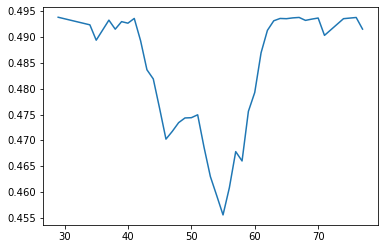

In [106]:
plt.plot(age_list, gini_values)